In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Importing the training set
dataset_train = pd.read_csv('iitglobal.csv')
training_set = dataset_train.iloc[:, 1:2].values # represent value of open stock column 


[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [21]:
# Feature Scaling --> normalize the values b/w 0 & 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [24]:
# Creating a data structure with 60 timesteps and 1 output.
# split the data b/w x_train and y_train
X_train = [] 
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])  # saare columns ke liye krega
    y_train.append(training_set_scaled[i, 0]) # same
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train) 

[0.77007299 0.73641525 0.73763179 ... 0.16504461 0.15896188 0.16626115]


In [23]:
# Reshaping (bcz we need only open stock column)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.6202352 ]
  [0.62226277]
  [0.64436334]
  ...
  [0.79622871]
  [0.81062449]
  [0.74371452]]

 [[0.62226277]
  [0.64436334]
  [0.61719384]
  ...
  [0.81062449]
  [0.74371452]
  [0.77007299]]

 [[0.64436334]
  [0.61719384]
  [0.61820762]
  ...
  [0.74371452]
  [0.77007299]
  [0.73641525]]

 ...

 [[0.19870235]
  [0.21796431]
  [0.21553122]
  ...
  [0.14963504]
  [0.14801298]
  [0.15815085]]

 [[0.21796431]
  [0.21553122]
  [0.20600162]
  ...
  [0.14801298]
  [0.15815085]
  [0.16504461]]

 [[0.21553122]
  [0.20600162]
  [0.21654501]
  ...
  [0.15815085]
  [0.16504461]
  [0.15896188]]]


In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation (mix of lstm and dropout)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # adam -> optimization algo.
# alag alag layers banai hai toh unko jod rhe toh woh optimized rhe isliye hamne adam and mean squared error as loss function

# Fitting the RNN to the Training set -> training of model
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)  

Epoch 1/100
62/62 [==============================] - 14s 87ms/step - loss: 0.0098
Epoch 2/100
62/62 [==============================] - 6s 90ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 6s 89ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 6s 91ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 6s 94ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 6s 92ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 6s 99ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 6s 96ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0020
Epoch 13/100
62/62 [

62/62 [==============================] - 5s 87ms/step - loss: 6.4025e-04
Epoch 99/100
62/62 [==============================] - 5s 88ms/step - loss: 6.0583e-04
Epoch 100/100
62/62 [==============================] - 6s 93ms/step - loss: 7.7871e-04


In [13]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of October 2018
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
# Getting the predicted stock price of October 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 [==============================] - 0s 44ms/step
[[119.7906 ]
 [187.26108]
 [215.78197]
 [221.01729]
 [221.22527]
 [227.0817 ]
 [229.85126]
 [226.32985]
 [223.29332]
 [215.95006]
 [213.52377]
 [213.73672]
 [209.10123]
 [212.65668]
 [218.70195]
 [224.47551]]


C:\Users\parvn\AppData\Local\Temp\ipykernel_2604\2335895705.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [19]:
print(real_stock_price)

[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


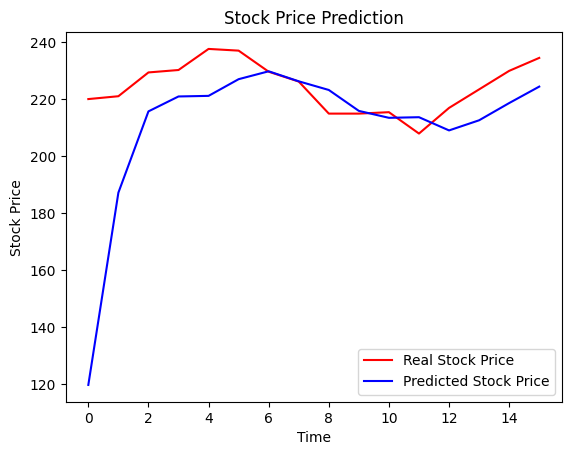

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()